In [4]:
from __future__ import division
from math import gcd

from random import randrange, getrandbits, randint
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import random


def gcd(a,b):
    if (b == 0):
         return a
    return gcd(b, a%b)

def lcm(a, b):

    return a * b // gcd(a,b)


    
def extendedEuclid(a, b):  
    if a == 0 :   
        return b,0,1
    gcd,x1,y1 =extendedEuclid(b%a, a)  
    x = y1 - (b//a) * x1  
    y = x1  
     
    return gcd,x,y 
    

def multiplicative_inverse(a, m):
    
    gcd,x,y = extendedEuclid(a,m)
        
    if(gcd!=1):
        raise Exception('modular inverse does not exist')
    else:
        return (x % m)
    

def binary_exponent(base, exponent, modulus):
    if modulus == 1:
        yield 0
        return
    bitmask = 1 << exponent.bit_length() - 1
    res = 1
    while bitmask:
        res = (res * res) % modulus
        if bitmask & exponent:
            res = (res * base) % modulus
        yield res
        bitmask >>= 1
        

from random import randrange, getrandbits
def is_prime(n, k=128):
 
    # Test if n is not even.
    # But care, 2 is prime !
    if n == 2 or n == 3:
        return True
    if n <= 1 or n % 2 == 0:
        return False
    # find r and s
    s = 0
    r = n - 1
    while r & 1 == 0:
        s += 1
        r //= 2
    # do k tests
    for _ in range(k):
        a = randrange(2, n - 1)
        x = pow(a, r, n)
        if x != 1 and x != n - 1:
            j = 1
            while j < s and x != n - 1:
                x = pow(x, 2, n)
                if x == 1:
                    return False
                j += 1
            if x != n - 1:
                return False
    return True
def generate_prime_candidate(length):
  
    # generate random bits
    p = getrandbits(length)
    # apply a mask to set MSB and LSB to 1
    p |= (1 << length - 1) | 1
    return p
def generate_prime(length=128):

    p = 4
    # keep generating while the primality test fail
    while not is_prime(p, 128):
        p = generate_prime_candidate(length)
    return p

In [4]:
import random

def generate_keys(bitlen=128):

    
    p = generate_prime(bitlen)
    q = generate_prime(bitlen)
    λ = lcm( p-1, q-1)
    n = p * q
    μ = multiplicative_inverse( λ, n)
    g=n+1
    PrivateKey = [ λ, μ]
    Publickey =[ n,g]
    
    return [Publickey, PrivateKey]


def Encrypt(public_key, plaintext):


    r = random.randint( 1, public_key[0]-1)
    while not gcd( r, public_key[0]) == 1:
        r = random.randint( 1, public_key[0])
        
    a = pow(public_key[1], plaintext, public_key[0]**2)
    b = pow(r, public_key[0], public_key[0]**2)
    
    ciphertext = (a * b) % public_key[0]**2
    return ciphertext


def Decrypt(public_key, private_key, ciphertext):
    
    x = pow(ciphertext, private_key[0], public_key[0]**2)
    L = lambda x: (x - 1) // public_key[0]
    
    plaintext = (L(x) * private_key[1]) % public_key[0] 
    return plaintext


def homomorphic_add(public_key, a, b):
  
    return (a * b) % public_key[0]**2


def homomorphic_add_constant(public_key, a, k):

    return a * pow( public_key[1], k, public_key[0]**2) % public_key[0]**2


def homomorphic_mult_constant(public_key, a, k):
  
    return pow(a, k, public_key[0]**2)

In [5]:
kok=generate_keys()

asaa = Encrypt(kok[0],11)

In [6]:
ans = Decrypt(kok[0],kok[1],asaa)
ans

11

In [7]:
import math
from random import randrange, getrandbits
from PIL import Image

In [8]:
import numpy as np

def ImgEncrypt(public_key, plainimg):
    
    cipherimg = np.asarray(plainimg)
    shape = cipherimg.shape
    cipherimg = cipherimg.flatten().tolist()
    n = len(cipherimg)
    
    for i in range(n):
        
        pix = cipherimg[i];
        encryptedpix = Encrypt( public_key, pix)
        cipherimg[i]=encryptedpix
    
        
    return np.asarray(cipherimg).reshape(shape)


def ImgDecrypt(public_key, private_key, cipherimg):
  
    shape = cipherimg.shape
    plainimg = cipherimg.flatten().tolist()
    n = len(plainimg)
    
    for i in range(n):
        
        pix= plainimg[i]
        decryptpix = Decrypt(public_key,private_key,pix)
        if decryptpix>255:
            decryptpix=255
        if decryptpix<0:
            decryptpix=0
        plainimg[i]=decryptpix
        
        
    
    return Image.fromarray(np.asarray(plainimg).reshape(shape).astype(np.uint8))


basewidth = 100
img = Image.open("lena.png")  

wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.show()
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


cipher_img=ImgEncrypt(kok[0],img)

Decrypt = ImgDecrypt(kok[0],kok[1],cipher_img)


In [9]:
cip_img = Image.fromarray(cipher_img, 'RGB')
cip_img.save("conco.png")
cip_img.show()
Decrypt.show()

In [16]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

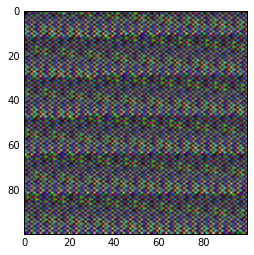

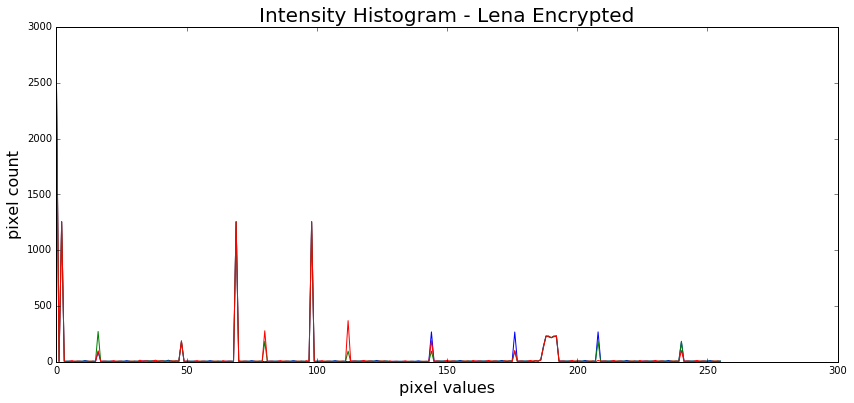

In [14]:
from matplotlib.pyplot import imshow
import cv2 
image = "conco"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Lena Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

100


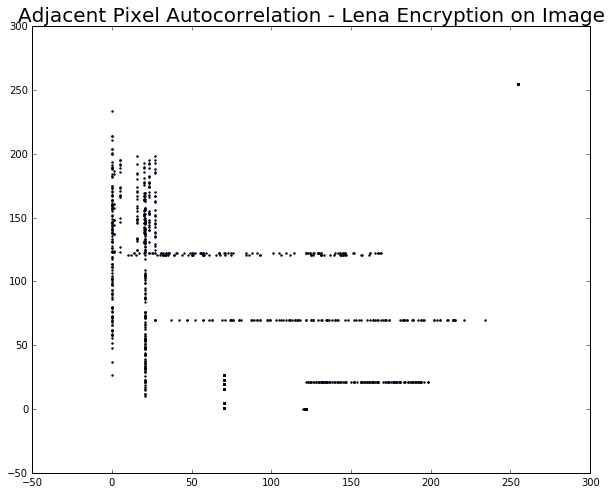

In [17]:
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Lena Encryption on Image', fontsize=20)
plt.show()